# Crime Rates in San Francisco

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib as mpl
import seaborn as sns

#### Names
- Patrick Tan 
- Caiti Johnson
- Jay Chong
- Anwen (Erwin) He 

## Overview
As a group we wanted to see if there was a direct correlation between a certain day of the week and a certain type of crime committed. We looked at four specific types of crime (vandalism, theft, assault, and drug related crime) and analyzed whether more of these types of crimes occured on the weekend or on weekdays. Furthermore, we did the same analysis by police district to see if there were any distinctions in patterns between mainly residential districts and mixed districts. Our results showed that vandalisms, theft, and assaults occur more often on the weekend, while drug related crimes occur more often on the weekdays, and we did not find any apparent patterns when analyzing by district type.  
    
###  Research Question
Are vandalism, theft, assault, and drug related crimes more prevalent on weekends than weekdays in San Francisco?

### Background & Prior Work
Understanding patterns of crime is crucial for police forces to maintain safety for the entire society. Numerous criminology studies have been conducted in the past to show that certain crimes are potentially conducted following temporal and spatial patterns, and thanks to development in methods of data collection and analysis, researchers and police are able to get sufficient data nowadays. We as a group are particularly interested in looking for a pattern between the frequency of specific types of crime and days within a weekly cycle. 
 
We found an article from the Oklahoman news website that tried to answer a similar question, except that it used data collected by the Oklahoma City police department. The result suggests that cases of burglary most commonly take place on Mondays and are the least common on Sundays, while cases of assault with weapons are most common on Saturdays and least common on Thursdays (1). We want to take a similar approach by looking at data within the region of San Francisco to see if we can find any patterns in crime as well.
 
Additionally, we found previously published work about car theft in San Francisco based on the time of day and day of the week. This research specifically focuses on car theft and focuses on the location and time of the crime, which is similar to the approach that we would want to take while doing our data science project (2).
<br> <br>
Our analysis involved looking at crime in each individual police district. To get a better sense of how the San Francisco Police Districts are divided, here is a map: 

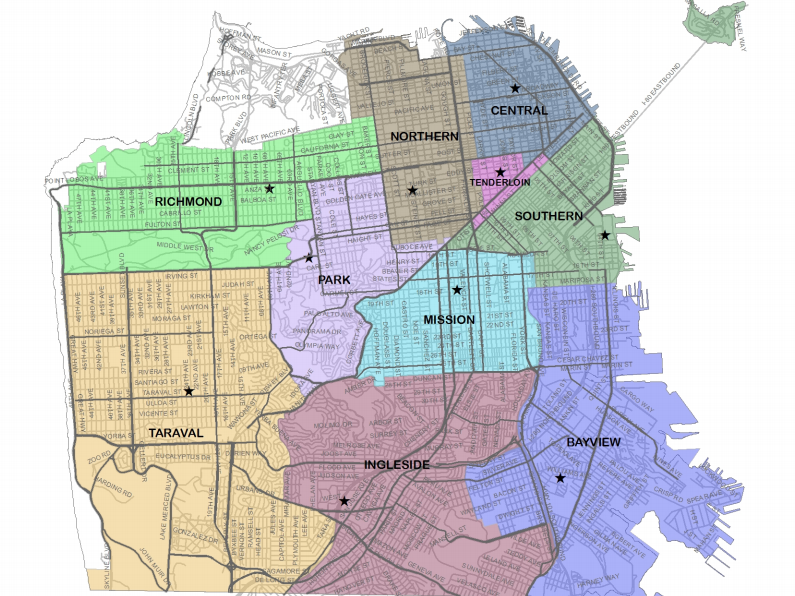

In [2]:
Image('sfpdfinal.png')

Below is a brief description of the make-up of each district (3):
- BAYVIEW: The area is mixed-use commercial and residential.
- CENTRAL: The area is both residential and tourist in nature. 
- INGLESIDE: The area is mostly residential
- MISSION: The area has many mixed-used residential and small businesses, except for the northeast section, which is more industrial.
- NORTHERN: The area includes mixed-use properties (south) and residential units (north).
- PARK: The area is mostly residential
- RICHMOND: The area is mostly residential and is home to Golden Gate Park.
- SOUTHERN:  The area is mixed-use commercial and residential and rapidly growing, with sporting venues, housing, businesses, and some tourism.
- TARAVAL: The area is mostly residential
- TENDERLOIN: The area is residential, comprised of; mostly Single Room Occupancy hotels (SROs) and very densely populated. 


### References

1. https://oklahoman.com/article/5541042/what-day-of-the-week-is-crime-most-common
2. https://rpubs.com/jonprice/crime 
3. http://www.publicsafetystrategies.com/wp-content/uploads/2015/03/SFPD-District-Station-Boundary-Analysis-Report-March-2015.pdf

### Hypothesis
We hypothesize that drugs will be more common on Fridays because it is the end of the week and more people would want to celebrate and do drugs to destress from the week of work. Furthermore, we hypothesize that theft would be more prominent on weekdays since people are more likely to be out in public, such as while commuting to work, which will increase their chance of being a victim of theft. Lastly, we hypothesize that assault and vandalism will be more prominent towards the weekend as people may be celebrating and getting intoxicated, potentially altering their judgement.

### Datasets

The dataset we chose to use is a dataset on all police incidents in San Francisco in the year 2016:
https://www.kaggle.com/roshansharma/sanfranciso-crime-dataset 

The dataset gives the incident number of the crime/report, what type of incident it was (vandalism, missing persons, theft, etc), the date the report was created/called in, the Day of the Week the incident took place, and the police district the incident took place in, along with a few other details. There are 150500 total incidents/observations in the dataset, 8589 of which corresponded to vandalisms, 40409 which corresponded to thefts, 13577 which corresponded to assaults, and 4243 which corresponded to drug related crimes.

In [3]:
df = pd.read_csv('data.csv')

## Data Cleaning
Our dataset was already clean, with all of its variables filled in, so the only cleaning we needed to do was remove columns that were unneccesary to our analysis.

Our dataset consist of 13 columns, 
       
| IncidntNum | Category | Descript | DayOfWeek | Date | Time | PdDistrict | Resolution | Address | X | Y | Location | PdId |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |

However, we will be removing some columns due to the scope of our question and in an effort of protecting the privacy of the individuals in the datasets. We have removed any column that may contain personal information such as a person's address and specific locations. We also removed all columns that are irelevant to our question.

Our final cleaned dataset are the following columns:

| Category | Descript | DayOfWeek | PdDistrict |
| --- | --- | --- | --- |

<br>
 

In [4]:
df = df[['Category', 'Descript', 'DayOfWeek', 'PdDistrict']]
df.head()

,Category,Descript,DayOfWeek,PdDistrict
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,SOUTHERN
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,SOUTHERN
2,WARRANTS,WARRANT ARREST,Monday,BAYVIEW
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,TENDERLOIN
4,NON-CRIMINAL,LOST PROPERTY,Friday,MISSION


## Data Analysis

### Vandalism
One of the categories we chose to look at was Vandalisms, so we want to create a dataframe that looks solely at Vandalisms.

In [5]:
df_van = df[df['Category'] == 'VANDALISM'].reset_index().drop('index', axis=1)
df_van_days = df_van.groupby('DayOfWeek').count().reset_index()

We then plotted a graph showing the number of vandalisms committed by day of week, along with a red line and a blue line representing the average number of vandalisms committed on a weekend day and the average number of vandalisms committed on a weekday, respectively. 

We're counting Friday as part of the weekend, since people's weekends typically start when they're done with school/work on Friday.

Text(0.5, 1.0, 'Vandalism in San Francisco by Day of Week')

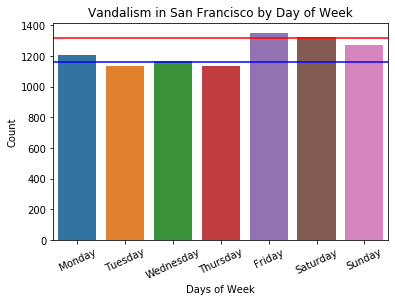

In [6]:
ax = sns.barplot(y = 'Category', x='DayOfWeek', data = df_van_days, 
            order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] )

ax.set(xlabel='DaysOfWeek', ylabel='Count')

avg_weekend = df_van_days[df_van_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
avg_weekday = df_van_days[~df_van_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
plt.axhline( y=avg_weekend, ls='-', c='red')
plt.axhline(y=avg_weekday, ls='-', c='blue')
ax.set(xlabel='Days of Week', ylabel='Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.title ("Vandalism in San Francisco by Day of Week")

We can see that the days **Friday**, **Saturday**, and **Sunday** have more vandalism crime than other days. Vandalisms are higher on the weekend than during the week since the red line is higher than the blue line. 


#### District Types
We now want to see if different districts in San Francisco follow a similar trend.
<br> <br>
In order to closely look at these districts and vandalism crimes, we decided to group them based on if each district has a single purpose or not.

As mentioned in our background, the Police Districts of Ingleside, Park, Richmond, Taraval, and Tenderloin are mainly residential, or what we will refer to as **'non-mixed'** districts. 
The Police Districts of Bayview, Central, Mission, Northern, and Southern are mixed use, containing residential properties as well as other property types such as commerical and business. We will refer to these districts as **'mixed'**.

In [7]:
dist_vans = df_van.groupby(['PdDistrict', 'DayOfWeek']).count().reset_index()

In [8]:
all_dist = dist_vans["PdDistrict"].unique()

In [9]:
mixed = ['BAYVIEW', 'CENTRAL', 'MISSION', 'NORTHERN', 'SOUTHERN']
non_mixed = ['INGLESIDE', 'PARK', 'RICHMOND', 'TARAVAL', 'TENDERLOIN']

Next, we will compare our mixed and non-mixed districts. 

/Users/cj55322/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/cj55322/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


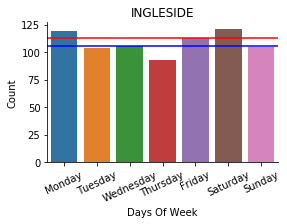

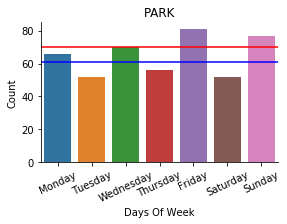

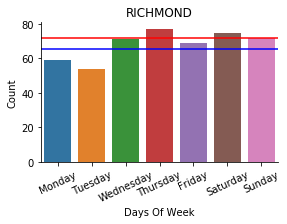

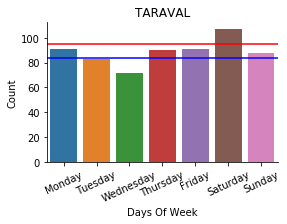

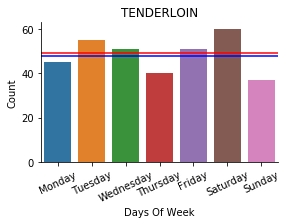

In [10]:

for i in non_mixed:
    avg_weekend = dist_vans[(dist_vans['PdDistrict'] == i) & 
                            (dist_vans['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_vans[(dist_vans['PdDistrict'] == i) & 
                            (~dist_vans['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_vans[dist_vans['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('Days Of Week')
    plt.title(i)
    plt.show()
    

This group of graphs is looking at vandalisms by day in each of the non-mixed police districts. Like in our graph looking at vandalism in all of San Francisco, the red line represents the average number of vandalisms seen on a weekend in that particular district, and the blue line represents the average number of vandalisms seen on a weekday in that particular district. We see that the non-mixed districts see more vandalisms on the weekend than on weekdays on average.

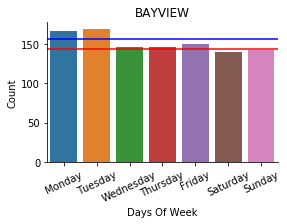

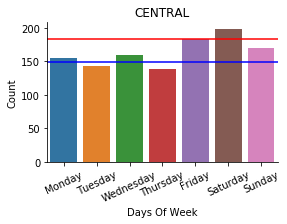

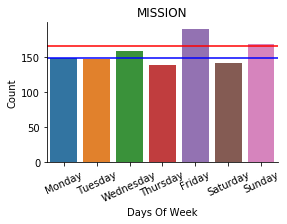

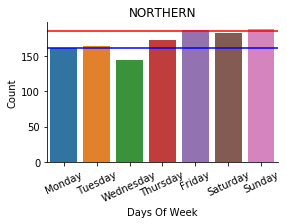

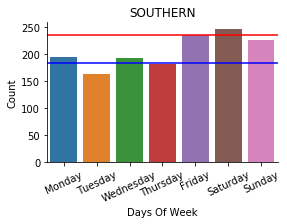

In [11]:
for i in mixed:
    avg_weekend = dist_vans[(dist_vans['PdDistrict'] == i) & 
                            (dist_vans['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_vans[(dist_vans['PdDistrict'] == i) & 
                            (~dist_vans['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_vans[dist_vans['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('Days Of Week')
    plt.title(i)
    plt.show()

These graphs depict the number of vandalisms seen each day of the week in mixed districts. The red and blue lines represent the same thing as in the above graphs, only for their respective districts. Most of the mixed districts follow a similar trend in that, on average, vandalism is more prevelent on the weekend vs the weekday. **Bayview** is the only district that doesn't follow this pattern.

### Theft
Another category we looked at was Theft, so we want to create a dataframe that looks solely at Thefts.

In [12]:
df_theft = df[df['Category'] == 'LARCENY/THEFT'].reset_index().drop('index', axis=1)
df_theft_days = df_theft.groupby('DayOfWeek').count().reset_index()

We then created a graph to look at theft by day of week in the same format as our overall vandalism graph above.

Text(0.5, 1.0, 'Theft in San Francisco by Day of Week')

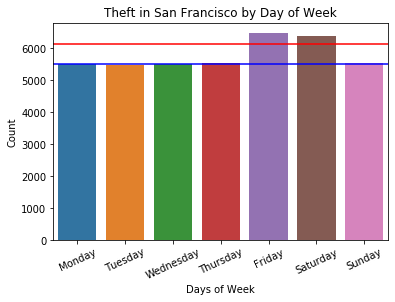

In [13]:
ax = sns.barplot(y = 'Category', x='DayOfWeek', data = df_theft_days, 
            order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] )

ax.set(xlabel='DaysOfWeek', ylabel='Count')

avg_weekend = df_theft_days[df_theft_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
avg_weekday = df_theft_days[~df_theft_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
plt.axhline( y=avg_weekend, ls='-', c='red')
plt.axhline(y=avg_weekday, ls='-', c='blue')
ax.set(xlabel='Days of Week', ylabel='Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.title ("Theft in San Francisco by Day of Week")


From the chart we can see that **Friday** and **Saturday** have more theft occurrences than the weekdays. The red line which represents the average number of weekend thefts is higher than the blue line which represents the average number of weekday thefts. This tells us that over the course of the week, we would expect to see more theft on the weekends, on average.


#### District Types

In [14]:
dist_theft = df_theft.groupby(['PdDistrict', 'DayOfWeek']).count().reset_index()

Similar to as we did with vandalisms, we're going to look at different types of districts.

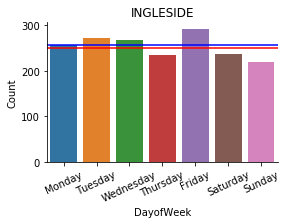

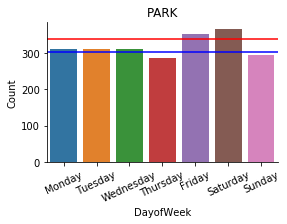

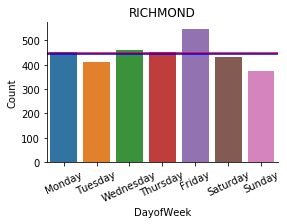

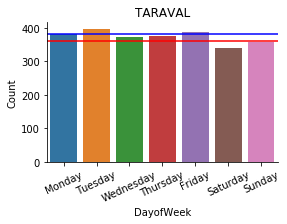

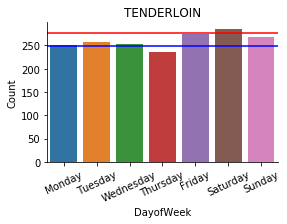

In [15]:
for i in non_mixed:
    avg_weekend = dist_theft[(dist_theft['PdDistrict'] == i) & 
                            (dist_theft['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_theft[(dist_theft['PdDistrict'] == i) & 
                            (~dist_theft['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_theft[dist_theft['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('DayofWeek')
    plt.title(i)
    plt.show()


Of the five non-mixed districts, **Park** and **Tenderloin** show higher theft on the weekends, **Ingleside** and **Taraval** show slightly lower theft on the weekends, and **Richmond** shows slightly higher theft on the weekends by just a hair, indicating that there is no general pattern for theft across the non-mixed districts

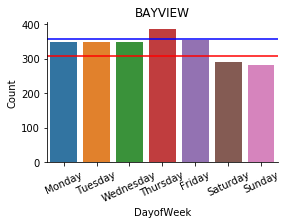

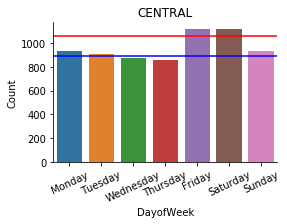

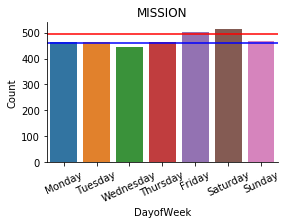

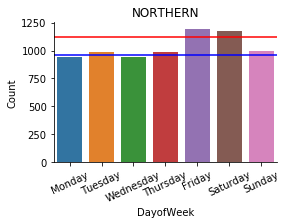

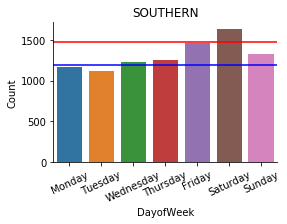

In [16]:
for i in mixed:
    avg_weekend = dist_theft[(dist_theft['PdDistrict'] == i) & 
                            (dist_theft['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_theft[(dist_theft['PdDistrict'] == i) & 
                            (~dist_theft['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_theft[dist_theft['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('DayofWeek')
    plt.title(i)
    plt.show()

When we look at mixed districts, we see that all districts show higher rates of theft on the weekend except for **Bayview**, which has a higher theft rate on weekdays, just as it has a higher average weekday vandalism rate. 

### Assault

The third type of crime we looked at was assaults, so we created a dataframe that looked solely at assaults. 

In [17]:
df_assault = df[df['Category'] == 'ASSAULT'].reset_index().drop('index', axis=1)
df_assault_days = df_assault.groupby('DayOfWeek').count().reset_index()

Now, we're going to look at the overall trend of assaults across the week.

Text(0.5, 1.0, 'Assault in San Francisco by Day of Week')

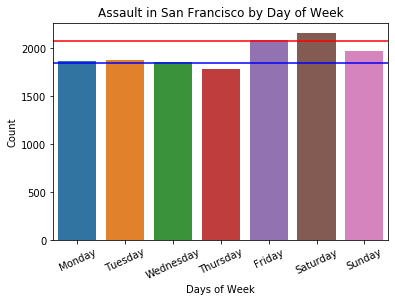

In [18]:
ax = sns.barplot(y = 'Category', x='DayOfWeek', data = df_assault_days, 
            order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] )

ax.set(xlabel='DayOfWeek', ylabel='Count')
avg_weekend = df_assault_days[df_assault_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
avg_weekday = df_assault_days[~df_assault_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
plt.axhline( y=avg_weekend, ls='-', c='red')
plt.axhline(y=avg_weekday, ls='-', c='blue')
ax.set(xlabel='Days of Week', ylabel='Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.title ("Assault in San Francisco by Day of Week")

When we group the days of the week into "weekends" and "weekdays," we see that assault occurs at a higher rate on the average weekend day than the average weekday, as depicted by the red line being higher than the blue line. 

#### District Types
We'll now look at assaults by district type, just as we did for vandalism and theft.

In [19]:
dist_assault = df_assault.groupby(['PdDistrict', 'DayOfWeek']).count().reset_index()

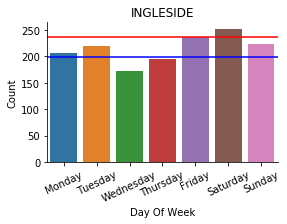

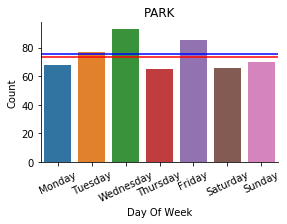

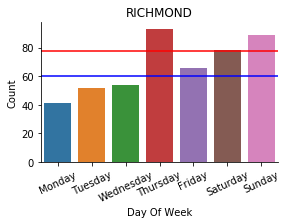

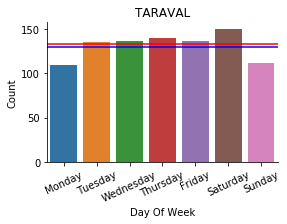

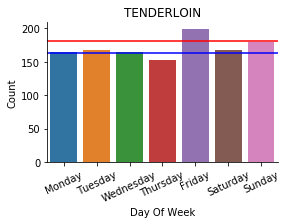

In [20]:
for i in non_mixed:
    avg_weekend = dist_assault[(dist_assault['PdDistrict'] == i) & 
                            (dist_assault['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_assault[(dist_assault['PdDistrict'] == i) & 
                            (~dist_assault['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_assault[dist_assault['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('Day Of Week')
    plt.title(i)
    plt.show()

When looking at the non-mixed districts individually, we see that **Ingleside**, **Richmond**, and **Tenderloin** see more assaults on average on a weekend day than a weekday, while **Taraval** only sees a slim increase on weekend days than weekdays, and **Park** sees a slight increase on weekdays.

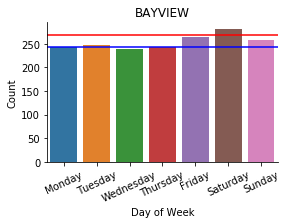

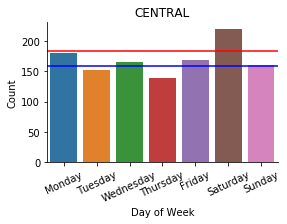

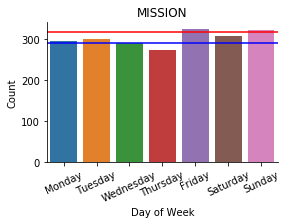

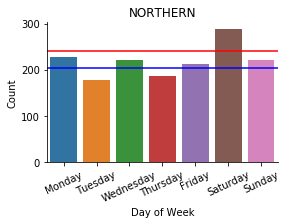

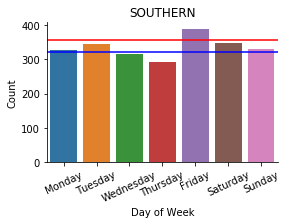

In [21]:
for i in mixed:
    avg_weekend = dist_assault[(dist_assault['PdDistrict'] == i) & 
                            (dist_assault['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_assault[(dist_assault['PdDistrict'] == i) & 
                            (~dist_assault['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_assault[dist_assault['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('Day of Week')
    plt.title(i)
    plt.show()

When looking at mixed districts, we see an increase in assaults on weekend days in every district.

### Drugs/Narcotics

The final crime we looked at was crime involving drugs/narcotics.

In [22]:
df_drug = df[df['Category'] == 'DRUG/NARCOTIC']
df_drug_days = df_drug.groupby('DayOfWeek').count().reset_index()

In [23]:
dist_drug = df_drug.groupby(['PdDistrict', 'DayOfWeek']).count().reset_index()

As we did for our other crime types, let's look at drug/narcotic related crimes by day of week. 

Text(0.5, 1.0, 'Drug/Narcotics in San Francisco by Day of Week')

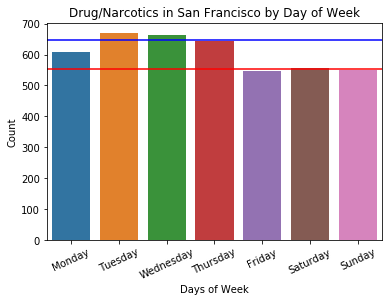

In [24]:
ax = sns.barplot(y = 'Category', x='DayOfWeek', data = df_drug_days, 
            order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] )

ax.set(xlabel='DaysOfWeek', ylabel='Count')

avg_weekend = df_drug_days[df_drug_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
avg_weekday = df_drug_days[~df_drug_days['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])].mean()[0]
plt.axhline( y=avg_weekend, ls='-', c='red')
plt.axhline(y=avg_weekday, ls='-', c='blue')
ax.set(xlabel='Days of Week', ylabel='Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.title ("Drug/Narcotics in San Francisco by Day of Week")


Contradictory to what we saw for vandalisms, assaults, and theft, we see drug and narcotic crimes having higher rates on the weekdays than the weekends. Let's see how this plays out when we look by police district.

#### District Types

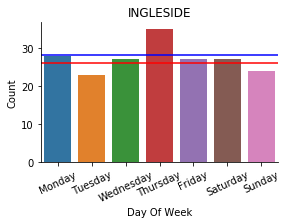

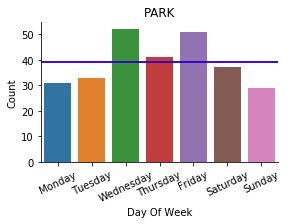

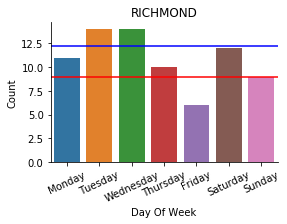

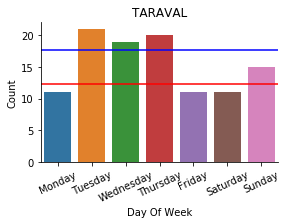

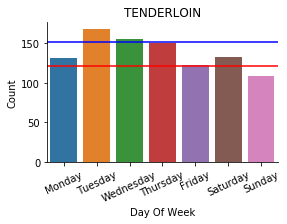

In [25]:
for i in non_mixed:
    avg_weekend = dist_drug[(dist_drug['PdDistrict'] == i) & 
                            (dist_drug['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_drug[(dist_drug['PdDistrict'] == i) & 
                            (~dist_drug['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_drug[dist_drug['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('Day Of Week')
    plt.title(i)
    plt.show()

We see a higher number of drug related crime on weekdays than weekends in all non-mixed districts.

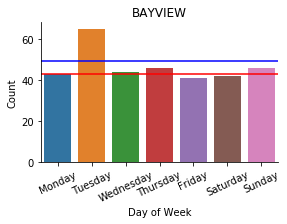

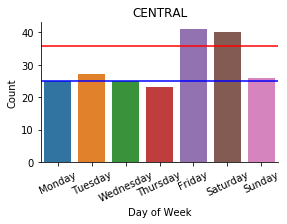

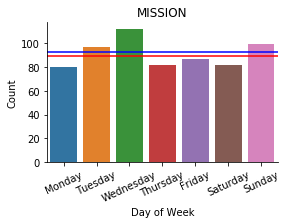

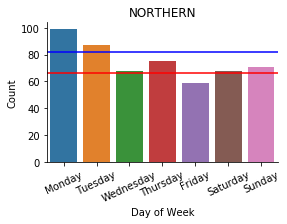

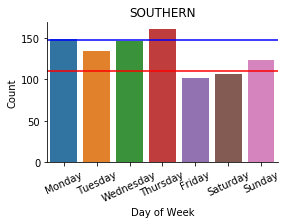

In [26]:
for i in mixed:
    avg_weekend = dist_drug[(dist_drug['PdDistrict'] == i) & 
                            (dist_drug['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    avg_weekday = dist_drug[(dist_drug['PdDistrict'] == i) & 
                            (~dist_drug['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday']))].mean()[0]
    g = sns.factorplot(x="DayOfWeek", y ='Category', col="PdDistrict",
                       data=dist_drug[dist_drug['PdDistrict'] == i],kind="bar", size=3, aspect=1.3,
                       order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
    g.set_xticklabels(rotation=25)
    g.map(plt.axhline, y=avg_weekend, ls='-', c='red')
    g.map(plt.axhline, y=avg_weekday, ls='-', c='blue')
    plt.ylabel('Count')
    plt.xlabel('Day of Week')
    plt.title(i)
    plt.show()
             

We observe a higher number of drug/narcotic cases on the average weekday in all mixed districts except for **Central**.

### Further Analysis

Now that we've looked at each type of crime individually, let's look at them as a whole.

In [27]:
df_assault_count = df_assault['DayOfWeek'].value_counts(normalize = True).rename_axis('Day of Week').reset_index(name = 'Assaults')
df_larceny_theft_count = df_theft['DayOfWeek'].value_counts(normalize = True).rename_axis('Day of Week').reset_index(name = 'Theft')
df_drug_count = df_drug['DayOfWeek'].value_counts(normalize = True).rename_axis('Day of Week').reset_index(name = 'Drugs and Narcotics')
df_vandalism_count = df_van['DayOfWeek'].value_counts(normalize = True).rename_axis('Day of Week').reset_index(name = 'Vandalism')


In [28]:
merged_df_1 = df_assault_count.merge(right = df_larceny_theft_count, on = ['Day of Week'])
merged_df_2 = merged_df_1.merge(right = df_drug_count, on = ['Day of Week'])
merged_df_3 = merged_df_2.merge(right = df_vandalism_count, on = ['Day of Week'])
all_crime_count_by_day = merged_df_3.reindex([4, 3, 5, 6, 1, 0, 2])
all_crime_count_by_day

,Day of Week,Assaults,Theft,Drugs and Narcotics,Vandalism
4,Monday,0.137365,0.136183,0.143295,0.140296
3,Tuesday,0.137954,0.135440,0.157907,0.132029
5,Wednesday,0.136407,0.136183,0.156493,0.136221
6,Thursday,0.131251,0.137049,0.151779,0.132146
1,Friday,0.153348,0.160286,0.129154,0.157178
0,Saturday,0.158872,0.157985,0.131511,0.153918
2,Sunday,0.144804,0.136875,0.129861,0.148213


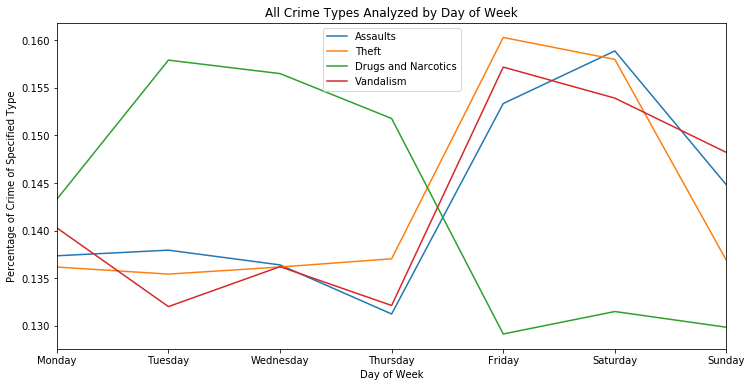

In [29]:
all_crime_count_by_day.plot.line(figsize = (12, 6), x = 'Day of Week')
plt.ylabel('Percentage of Crime of Specified Type')
plt.title('All Crime Types Analyzed by Day of Week')
plt.show()

As seen in the graph, vandalism, theft, and assaults are at their highest rates over the weekend, peaking on either Friday or Saturday. Drug/Narcotic crimes, however, show the opposite trend: they are highest during the weekday, and lowest over the weekend. 

Note: We chose to put percentage on the y-axis as opposed to count, which we use on all our other graphs, because we wished to normalize the data to better depict the trend. Normalization was not needed for our other graphs because each graph was looking at a single crime and neighborhood, not comparing over multiple. 

We can also look at crime type by neighborhood:

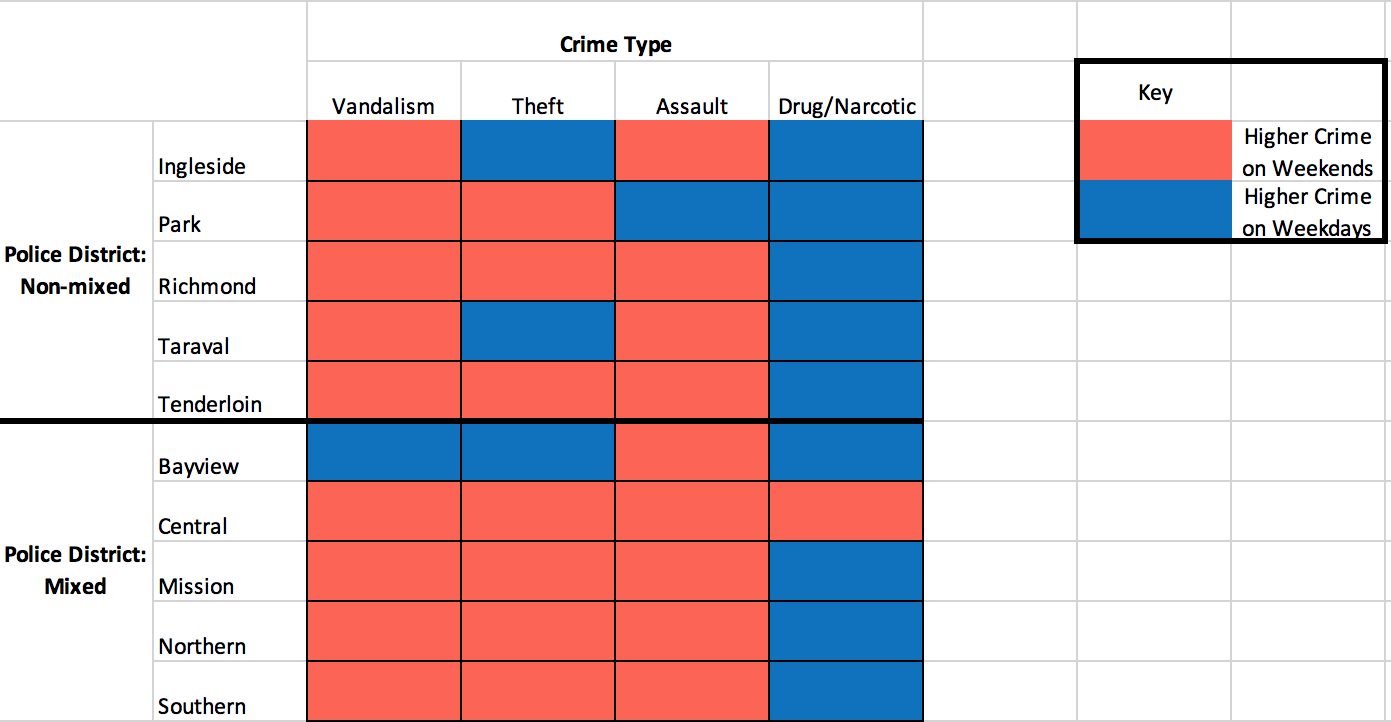

In [30]:
Image('PDistrict_graph.png')

From looking at the chart, there do not appear to be any uniform patterns between the district types, so we are unable to conclude if there are any differences in crime between the two.

# Privacy/Ethics Considerations
Since we are not gathering data from specific users we don’t think we will run into issues with exposing sensitive user data. However, if we find a correlation between a specific day and a crime, people may find that a specific day would be the best day to commit a crime. Furthermore, they may misuse our data and try to commit crimes on days where security may be more relaxed since less crimes occur on a specific day. 

In terms of biases, since our data comes from observations, there shouldn’t be any biases in our data; however, since our analysis only applies to San Francisco we should not generalize it to the entire population.


# Conclusion and Discussion

We hypothesized that assaults and vandalisms would be more prevalent on the weekends as opposed to the weekdays. Our analysis shows this to be true, as these crimes occur the most on Fridays, Saturdays, and Sundays. Likewise, we hypothesized that drugs would be most common on the weekends as well, in particular Friday. Our analysis showed this to be false, however, as drug related crimes occured most often during weekdays, peaking on Tuesdays. We hypothesized that theft would be most prevalent on the weekdays. Our analysis showed this to be false, however, as theft is most common on the weekends, peaking on Fridays. 

While our hypotheses about vandalism and assault were correct, we are unable to conclude if their increase in prevalence on the weekend is in fact due to people getting intoxicated as we suggested in our hypothesis, so we can only speculate about the true cause of this pattern. 

Given the mixed results in our district-wide analysis, we are unable to conclude if any of the types of crime we looked at are more prevalent in mixed districts or non-mixed (mainly residential) districts. 

A limitation to our analysis is that we only have access to the crimes that were called in to the police and/or reported by police. The number of crimes that are happening are potentially much higher than the number we see here, and there may be outside forces influencing the patterns we see. For example, people may be  more inclined to call in a certain crime on a certain day, or police officers may be stationed in certain locations at certain times on certain days, influencing when they report certain types of crime. 

# Team Contributions
**Patrick Tan**: Overview, Background, Hypothesis, Theft section of Data Analysis, Privacy and Ethics 

**Caiti Johnson**: Overview, Hypothesis, Assault section of Data Analysis, Further Analysis section, Conclusion and Discussion

**Jay Chong**: Research Question, Background, Hypothesis, Data Cleaning, Vandalism section of Data Analysis 

**Anwen (Erwin) He**: Hypothesis, Drug/Narcotic section of Data Analysis, Further Analysis section, Conclusion and Discussion